In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
salaries_df = pd.read_csv("Position_Salaries.csv")
salaries_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = salaries_df["Level"].values.reshape(-1,1) # We dont want to consider the Position column cause we can already decide the job-positions from Level Column
y = salaries_df["Salary"].values.reshape(-1, 1)

No splitting of data because we want to leverage the maximum data for training 

#### Equation for Linear Regression
* y = b0 + b1(x1) 

#### Training the Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y);

#### Equation for Polynomial Regression
* y = b0 + b1(x1) + b2(x1^2) + ... + bn(x1^n)

#### Training the Polynomial Regression Model

Generating new features is a common technique in machine learning to improve the performance of a model. In the case of **polynomial regression**, generating new features by raising the original features to higher powers allows the model to capture more complex, non-linear relationships between the independent and dependent variables.

In other words, by generating new features, we can transform a non-linear relationship into a linear relationship that can be modeled using linear regression. This can result in a better fit to the data and more accurate predictions.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # creates an instance of the PolynomialFeatures class with a degree of 2, meaning that 
                                          # it will generate new features that are squared versions of the original features 

# Infact this line is creating this equation for us: y = b0 + b1(x1) + b2(x1^2) + ... + bn(x1^n). 
# With degree set to 2, we have our variables till the 3rd term  i.e b2(x1^2)

X_poly = poly_reg.fit_transform(X)  # The fit_transform method transforms the original feature matrix X into a new matrix X_poly
                                    # that contains both the original features and their squared versions.
# X_poly is the matrix of our new features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y);

#### Visualising the Linear Regression Results

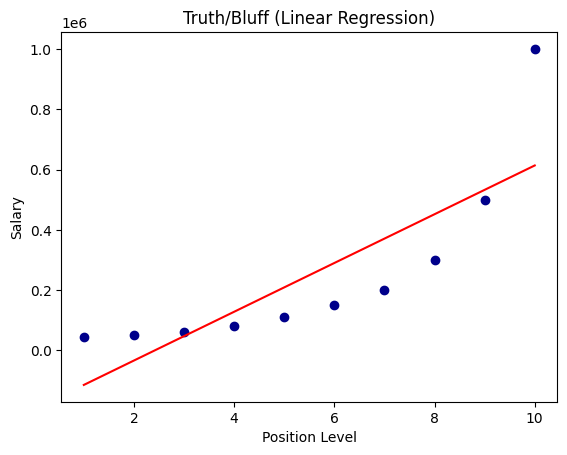

In [6]:
plt.scatter(X,y,color="darkblue") # Plotting original features
plt.plot(X,lin_reg.predict(X),color="red") # Plotting predicted values
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Truth/Bluff (Linear Regression)")
plt.show();

This graph tells us that the linear regression model is not well adapted for the curve

#### Visualizing the Polynomial Regression results

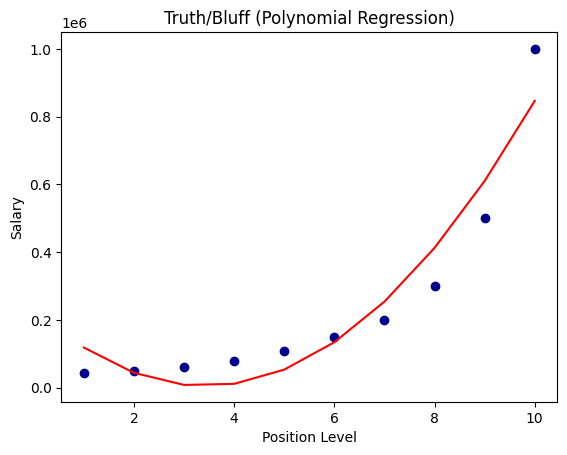

In [7]:
plt.scatter(X,y,color="darkblue") # Plotting original features
plt.plot(X,lin_reg_2.predict(X_poly),color="red") # X_poly is the variable that is giving us the new features of our polynomial regression equation
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Truth/Bluff (Polynomial Regression)")
plt.show();

This is the plot with n=2, with increasing the exponent n, we will start getting even better results. You can change the value of degree parameter in the "training polynomial regression" section. *(Though doing so can or might result in overfitting)*

#### Predicting a new result with Linear Regression

In [8]:
lin_reg.predict([[6.5]]) # The predict method demands a 2-d Array as an argument

array([[330378.78787879]])

This tells us that linear regression model has performed wrongly and predicted a wrong value. The value should be between 150k - 200k

#### Predicting a new result with Polynomial Regression

In [9]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[189498.10606061]])

The reason you need to put **poly_reg.fit_transform(*number you like to predict*)** as an argument to **lin_reg_2.predict()** is because 

the predict method of the LinearRegression class expects its input to have the same number of features as the data used to fit the model1. Since you fit the model using the transformed feature matrix X_poly, which was generated by calling poly_reg.fit_transform(X), you need to transform any new data you want to predict on using the same transformation. This ensures that the new data has the same number of features as the data used to fit the model.